In [5]:
import numpy as np
import cvxpy as cp
import networkx as nx

from numpy.random import default_rng
from opt_utils import decompose_psd, hyperplane_rounding, complex_hyperplane_rounding, fixed_point_iteration, normalize_rows

# Max-cut

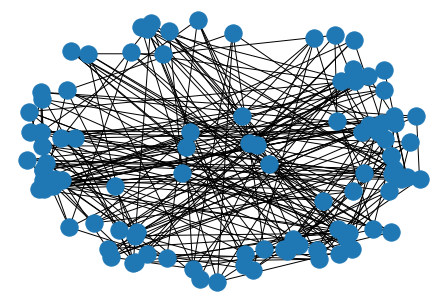

In [6]:
data_path = "../dat/"
# graph_file = "torusg3-8.dat"
graph_file = "toruspm3-8-50.dat"

with open(data_path + graph_file) as inf:
    next(inf, '')   # skip first line
    G = nx.read_weighted_edgelist(inf, nodetype=int, encoding="utf-8")

G = G.subgraph(range(100))
nx.draw(G)

# first_vertex = np.floor(default_rng().random() * (len(G) - n - 1)).astype(int)
# G = G.subgraph(range(first_vertex, first_vertex + n))

In [7]:
n = len(G)
L = nx.laplacian_matrix(G).toarray() * 1.0

In [8]:
X = cp.Variable((n,n), PSD=True)
constraints = [ X[i][i] == 1 for i in range(n) ]
prob = cp.Problem(cp.Maximize(1/4 * (cp.trace(L @ X))), constraints)
prob.solve()

91.46726944484048

In [9]:
hyperplane_rounding(decompose_psd(X.value), lambda Y : -1/4 * np.trace(Y @ Y.T @ L))

(-82.0,
 array([[-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
  

In [10]:
fixed_point_iteration(prob, X, False)

Initial rank:  13
Initial objective:  91.46726944484048
Current objective:  88.74234860000041
Current rank:  2
Current objective:  82.33231314533973
Current rank:  2
Current objective:  80.999999998215
Current rank:  1
Current objective:  80.99999999999957
Current rank:  1
Current objective:  80.99999999999997
Current rank:  1
Fixed point rank:  1
Fixed point objective:  80.99999999999997
Fixed point eigenvalues:
[-1.27983925e-14 -4.58663729e-15 -4.26048635e-15 -3.79288069e-15
 -3.66816405e-15 -3.32033884e-15 -3.14969773e-15 -2.96152143e-15
 -2.82896029e-15 -2.67048667e-15 -2.45472833e-15 -2.33666036e-15
 -2.23972853e-15 -2.10887353e-15 -2.07678795e-15 -2.00899970e-15
 -1.83449629e-15 -1.76748039e-15 -1.71279399e-15 -1.54855796e-15
 -1.45625073e-15 -1.39167984e-15 -1.30434944e-15 -1.24713801e-15
 -1.15795885e-15 -1.03724866e-15 -1.00160505e-15 -9.65165570e-16
 -9.24462447e-16 -8.27338474e-16 -6.73558451e-16 -6.38105630e-16
 -4.70120220e-16 -4.49417840e-16 -3.90980768e-16 -3.58382639e-1

# PhaseCut

In [11]:
n = 50  # number of observations
p = 20  # dimension of x
max_val = 1e2

In [12]:
rng = default_rng()
A = rng.random((n,p)) * max_val + rng.random((n,p)) * max_val * 1j
assert np.linalg.matrix_rank(A, tol=1e-9) >= p  # A must be injective; if the rows of A are linearly independent, AA+ = I
b = rng.random(n) * max_val
M = np.diag(b) @ (np.identity(n) - A @ np.linalg.pinv(A)) @ np.diag(b)

In [13]:
U = cp.Variable((n,n), hermitian=True)

### Unit modulus

In [14]:
constraints = [U >> 0]
constraints += [U[i][i] == 1 for i in range(n)]

prob = cp.Problem(cp.Minimize(cp.real(cp.trace(M @ U))), constraints)
prob.solve()

558.2144540049575

In [15]:
complex_hyperplane_rounding(decompose_psd(U.value), lambda u : np.real(u.conj().T @ M @ u))

(array([[6592.63282944]]),
 array([[-0.91380321-0.40615722j],
        [ 0.7186045 -0.695419j  ],
        [-0.09751884+0.99523368j],
        [ 0.63480246+0.77267447j],
        [ 0.32668834+0.94513212j],
        [-0.93633687-0.35110291j],
        [-0.95282359-0.30352463j],
        [-0.96980394-0.24388587j],
        [ 0.03736268+0.99930177j],
        [ 0.61533838-0.78826308j],
        [-0.53968131-0.8418694j ],
        [-0.85820743-0.51330304j],
        [-0.97968659-0.20053476j],
        [-0.3154305 -0.94894868j],
        [-0.52717058-0.84975948j],
        [ 0.12229099+0.99249429j],
        [ 0.36904487-0.92941158j],
        [-0.74774579-0.66398512j],
        [ 0.2450969 +0.96949859j],
        [-0.57829181-0.81583j   ],
        [-0.98517814+0.17153435j],
        [ 0.51294754-0.85841996j],
        [-0.3964635 -0.91805049j],
        [-0.33798086+0.94115298j],
        [ 0.21314111+0.97702143j],
        [-0.97716848+0.2124659j ],
        [ 0.11118795-0.9937994j ],
        [-0.67643437+0.73650

In [16]:
fixed_point_iteration(prob, U, True)

Initial rank:  5
Initial objective:  558.2144540049575
Current objective:  4696.869626198174
Current rank:  19
Current objective:  12673.264797335078
Current rank:  4
Current objective:  12673.264799858296
Current rank:  1
Current objective:  12673.264799858807
Current rank:  1
Fixed point rank:  1
Fixed point objective:  12673.264799858807
Fixed point eigenvalues:
[-6.61011743e-15  1.96461985e-15  2.24088670e-15  2.50723175e-15
  2.68641691e-15  2.77800207e-15  2.87060642e-15  3.04195086e-15
  3.13306711e-15  3.22372853e-15  3.29346405e-15  3.40351734e-15
  3.52388000e-15  3.64330827e-15  3.70907081e-15  3.79173071e-15
  3.85744076e-15  3.98636078e-15  4.03001627e-15  4.15696825e-15
  4.24175485e-15  4.33565851e-15  4.40526374e-15  4.54450613e-15
  4.61597021e-15  4.67380737e-15  4.78683110e-15  4.88766159e-15
  4.96927102e-15  5.07003883e-15  5.14676644e-15  5.23079739e-15
  5.34408291e-15  5.44876430e-15  5.47511115e-15  5.62650352e-15
  5.69311383e-15  5.79475671e-15  5.91446493e-1

### Relaxed bounds

In [19]:
delta = 0.05

In [24]:
constraints = [U >> 0]
constraints += [cp.real(U[i][i]) >= 1 - delta for i in range(n)]
constraints += [cp.real(U[i][i]) <= 1 + delta  for i in range(n)]

prob = cp.Problem(cp.Minimize(cp.real(cp.trace(M @ U))), constraints)
prob.solve()

309.6017006003587

In [21]:
complex_hyperplane_rounding(decompose_psd(U.value), lambda u : np.real(u.conj().T @ M @ u), 1 - delta, 1 + delta)

(array([[3774.84869574]]),
 array([[-0.74863275-0.73623977j],
        [ 0.81504047-0.66197359j],
        [-0.17975372+0.932839j  ],
        [ 0.23559683+0.92032284j],
        [ 0.31142682+1.00275288j],
        [-0.62959268-0.84030533j],
        [-0.65360767-0.82176457j],
        [-0.92192376-0.50255007j],
        [ 0.45037174+0.83645998j],
        [ 0.94763838-0.45219632j],
        [ 0.7413439 -0.59406163j],
        [-0.59300251-0.74219137j],
        [-0.31525645-1.00155548j],
        [ 0.59446253-0.8655139j ],
        [-0.36140383-0.88198236j],
        [-0.58902518+0.74535182j],
        [ 0.89986903-0.30452542j],
        [ 0.54559999-0.89711797j],
        [-0.90396565+0.44528401j],
        [ 0.20797522-0.9269554j ],
        [-0.79091842-0.69061426j],
        [ 0.94688211+0.07690425j],
        [ 0.69013231-0.79133899j],
        [-0.40716537+0.85832183j],
        [ 0.39836597+0.97149604j],
        [-0.91842096+0.24290521j],
        [ 0.96613361-0.41120049j],
        [-0.97867134+0.38039

In [22]:
fixed_point_iteration(prob, U, True)

Initial rank:  21
Initial objective:  309.6017006003587
Current objective:  5275.076146016024
Current rank:  49
Current objective:  12502.94072055688
Current rank:  13
Current objective:  12502.940809993082
Current rank:  50
Current objective:  12502.940809995176
Current rank:  50
Fixed point rank:  50
Fixed point objective:  12502.940809995176
Fixed point eigenvalues:
[1.61493213e-09 1.61494185e-09 1.61494198e-09 1.61494211e-09
 1.61494229e-09 1.61494241e-09 1.61494261e-09 1.61494270e-09
 1.61494278e-09 1.61494299e-09 1.61494310e-09 1.61494320e-09
 1.61494326e-09 1.61494337e-09 1.61494347e-09 1.61494353e-09
 1.61494362e-09 1.61494365e-09 1.61494376e-09 1.61494385e-09
 1.61494400e-09 1.61494410e-09 1.61494425e-09 1.61494433e-09
 1.61494447e-09 1.61494450e-09 1.61494463e-09 1.61494473e-09
 1.61494480e-09 1.61494493e-09 1.61494504e-09 1.61494520e-09
 1.61494521e-09 1.61494529e-09 1.61494541e-09 1.61494554e-09
 1.61494567e-09 1.61494577e-09 1.61494581e-09 1.61494588e-09
 1.61494610e-09 1.